# Basic Feature Handling
- Filter, Select, Sort
- User Defined Functions
- Lambda Functions
- Create Basic Features
    - Numerical Binning
    - Create Flags
- Basic Summary

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## How many Countries does this bank have its presence?

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Geography'].nunique()

3

In [8]:
df['Geography'].unique().tolist()

['France', 'Spain', 'Germany']

## Which Country has the most customers?

In [12]:
df['CustomerId'].nunique()

10000

In [13]:
df['Geography'].value_counts()

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [16]:
df['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [21]:
df['Geography'].value_counts(ascending=True).index.tolist()[0]

'Spain'

In [22]:
df['Geography'].value_counts(ascending=False).index.tolist()[0]

'France'

In [20]:
df['Geography'].value_counts()[0]

5014

## Find the Top 10 Customers based on Credit Score and return only (Name and Credit Score)

In [30]:
top_10_cust_score = df[['Surname', 'CreditScore', 'Gender']].sort_values(by = 'CreditScore', ascending = False).head(10)
top_10_cust_score

,Surname,CreditScore,Gender
792,Summers,850,Female
4083,Kambinachi,850,Female
4158,Davison,850,Female
4157,Watson,850,Male
7413,Vachon,850,Female
4141,Moran,850,Male
7470,Afanasyev,850,Female
4104,Bezrukova,850,Male
4071,H?,850,Female
7371,Grant,850,Male


In [32]:
top_10_cust_score = df.sort_values(by = 'CreditScore', ascending = False)[['Surname', 'CreditScore']].head(10)
top_10_cust_score

,Surname,CreditScore
792,Summers,850
4083,Kambinachi,850
4158,Davison,850
4157,Watson,850
7413,Vachon,850
4141,Moran,850
7470,Afanasyev,850
4104,Bezrukova,850
4071,H?,850
7371,Grant,850


## Select Top 10 Customers from Spain which have Tenure equal to 10

In [36]:
#Select from DataFrame using criteria from multiple columns
cust_spain = df[(df['Geography'] == 'Spain') & (df['Tenure'] == 10)].sort_values(by = 'CreditScore', ascending = False)[['Surname', 'CreditScore']].head(10)
cust_spain

,Surname,CreditScore
9646,Muir,850
1872,Ellis,850
1799,McKay,850
1556,Onyemachukwu,850
632,Mirams,839
6529,Sharwood,836
7101,Donaldson,831
7586,Dale,828
4096,Vasilyeva,820
6715,Niu,808


## Convert Gender from Object to Numeric - Use Lambda

In [37]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df['CreditScore_1'] = df['CreditScore'].apply(lambda x : x * 10)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_1
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,6190
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,6080
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,5020
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,6990
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,8500


In [39]:
df.to_csv('changed_data.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


## Log Transform Age, Balance and Estimated Salary
- Transform then Replace in df 
- Write a Function
- Write a loop

In [48]:
numerical_features = ['Age', 'Balance', 'EstimatedSalary']

<AxesSubplot:>

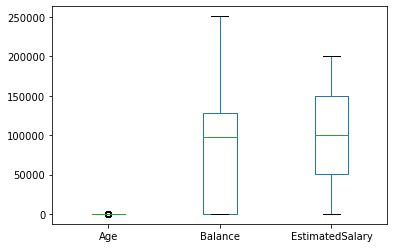

In [66]:
df[numerical_features].plot.box()

In [57]:
#df['Age'] = np.log(df['Age'])
#df['Balance'] = np.log(df['Balance']) 
#df['EstimatedSalary'] = np.log(df['EstimatedSalary'])

In [44]:
# write function here, call it - log_transformation
def log_transformation(feature_name):
    return np.log(df[feature_name]+1)

In [46]:
# write a code to replace the age with the tranformed data
log_transformation('EstimatedSalary')

0       11.526334
1       11.631096
2       11.643362
3       11.449215
4       11.278280
          ...    
9995    11.474929
9996    11.529790
9997    10.647484
9998    11.439166
9999    10.550376
Name: EstimatedSalary, Length: 10000, dtype: float64

In [49]:
numerical_features

['Age', 'Balance', 'EstimatedSalary']

In [51]:
# write a loop to do the same for 3 features
for feat in numerical_features:
    df[feat] = log_transformation(feat)

<AxesSubplot:>

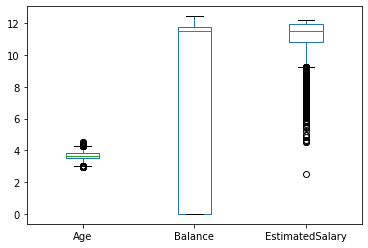

In [52]:
df[numerical_features].plot.box()